# Assignment 3 - Diabetes Data
Group Number 7
* Angelina Buysse
* Pranav Ramasahayam
* William Reimer
* Austin Rollfing
---
### Summary Of Results
i. Shape of frame: 442 x 11

ii. Range of target value: 321

iii. Features most strongly correlated with the target:
1. *bmi* @ 0.586450
2. *s5* @ 0.565883
3. *bp* @ 0.441482

iv. Model performance summary:

The linear and polynomial models performed relatively similarly on the data set. The polynomial model showed high overfitting at low train set sizes, but this was overcome by training on more data.


With the regularization techniques (Ridge, Lasso, Elastic-Net) applied, the models performed about the same. On the linear model, the Lasso regularization performed slightly worse than the other two while on the polynomial model the Lasso regularization performed slightly better than the other two.

Future work might include a grid search technique to optimize the hyperparameters for each model and draw better performance.

---

First, all necessary libraries are imported.

In [2]:
import pandas as pd
import numpy as np
from seaborn import pairplot
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import LearningCurveDisplay

Then, the diabetes dataset is loaded. The dataset is loaded without the default scaling, as a scaling will be used in the **Pipeline** for the models.

In [3]:
diabetes = load_diabetes(as_frame=True, scaled=False)
X = diabetes.data
y = diabetes.target
frame = diabetes.frame

**DataFrame.info()** is used to find the shape and feature names of the dataset.

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**DataFrame.describe()** can be used to get the overall statistics of each column in the dataset.

In [5]:
frame.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


The range of the target value is equal to the maximum value minus the minimum, equal to 321.

Then, *seaborn's* **pairplot()** function can be used to visually correlate each feature.

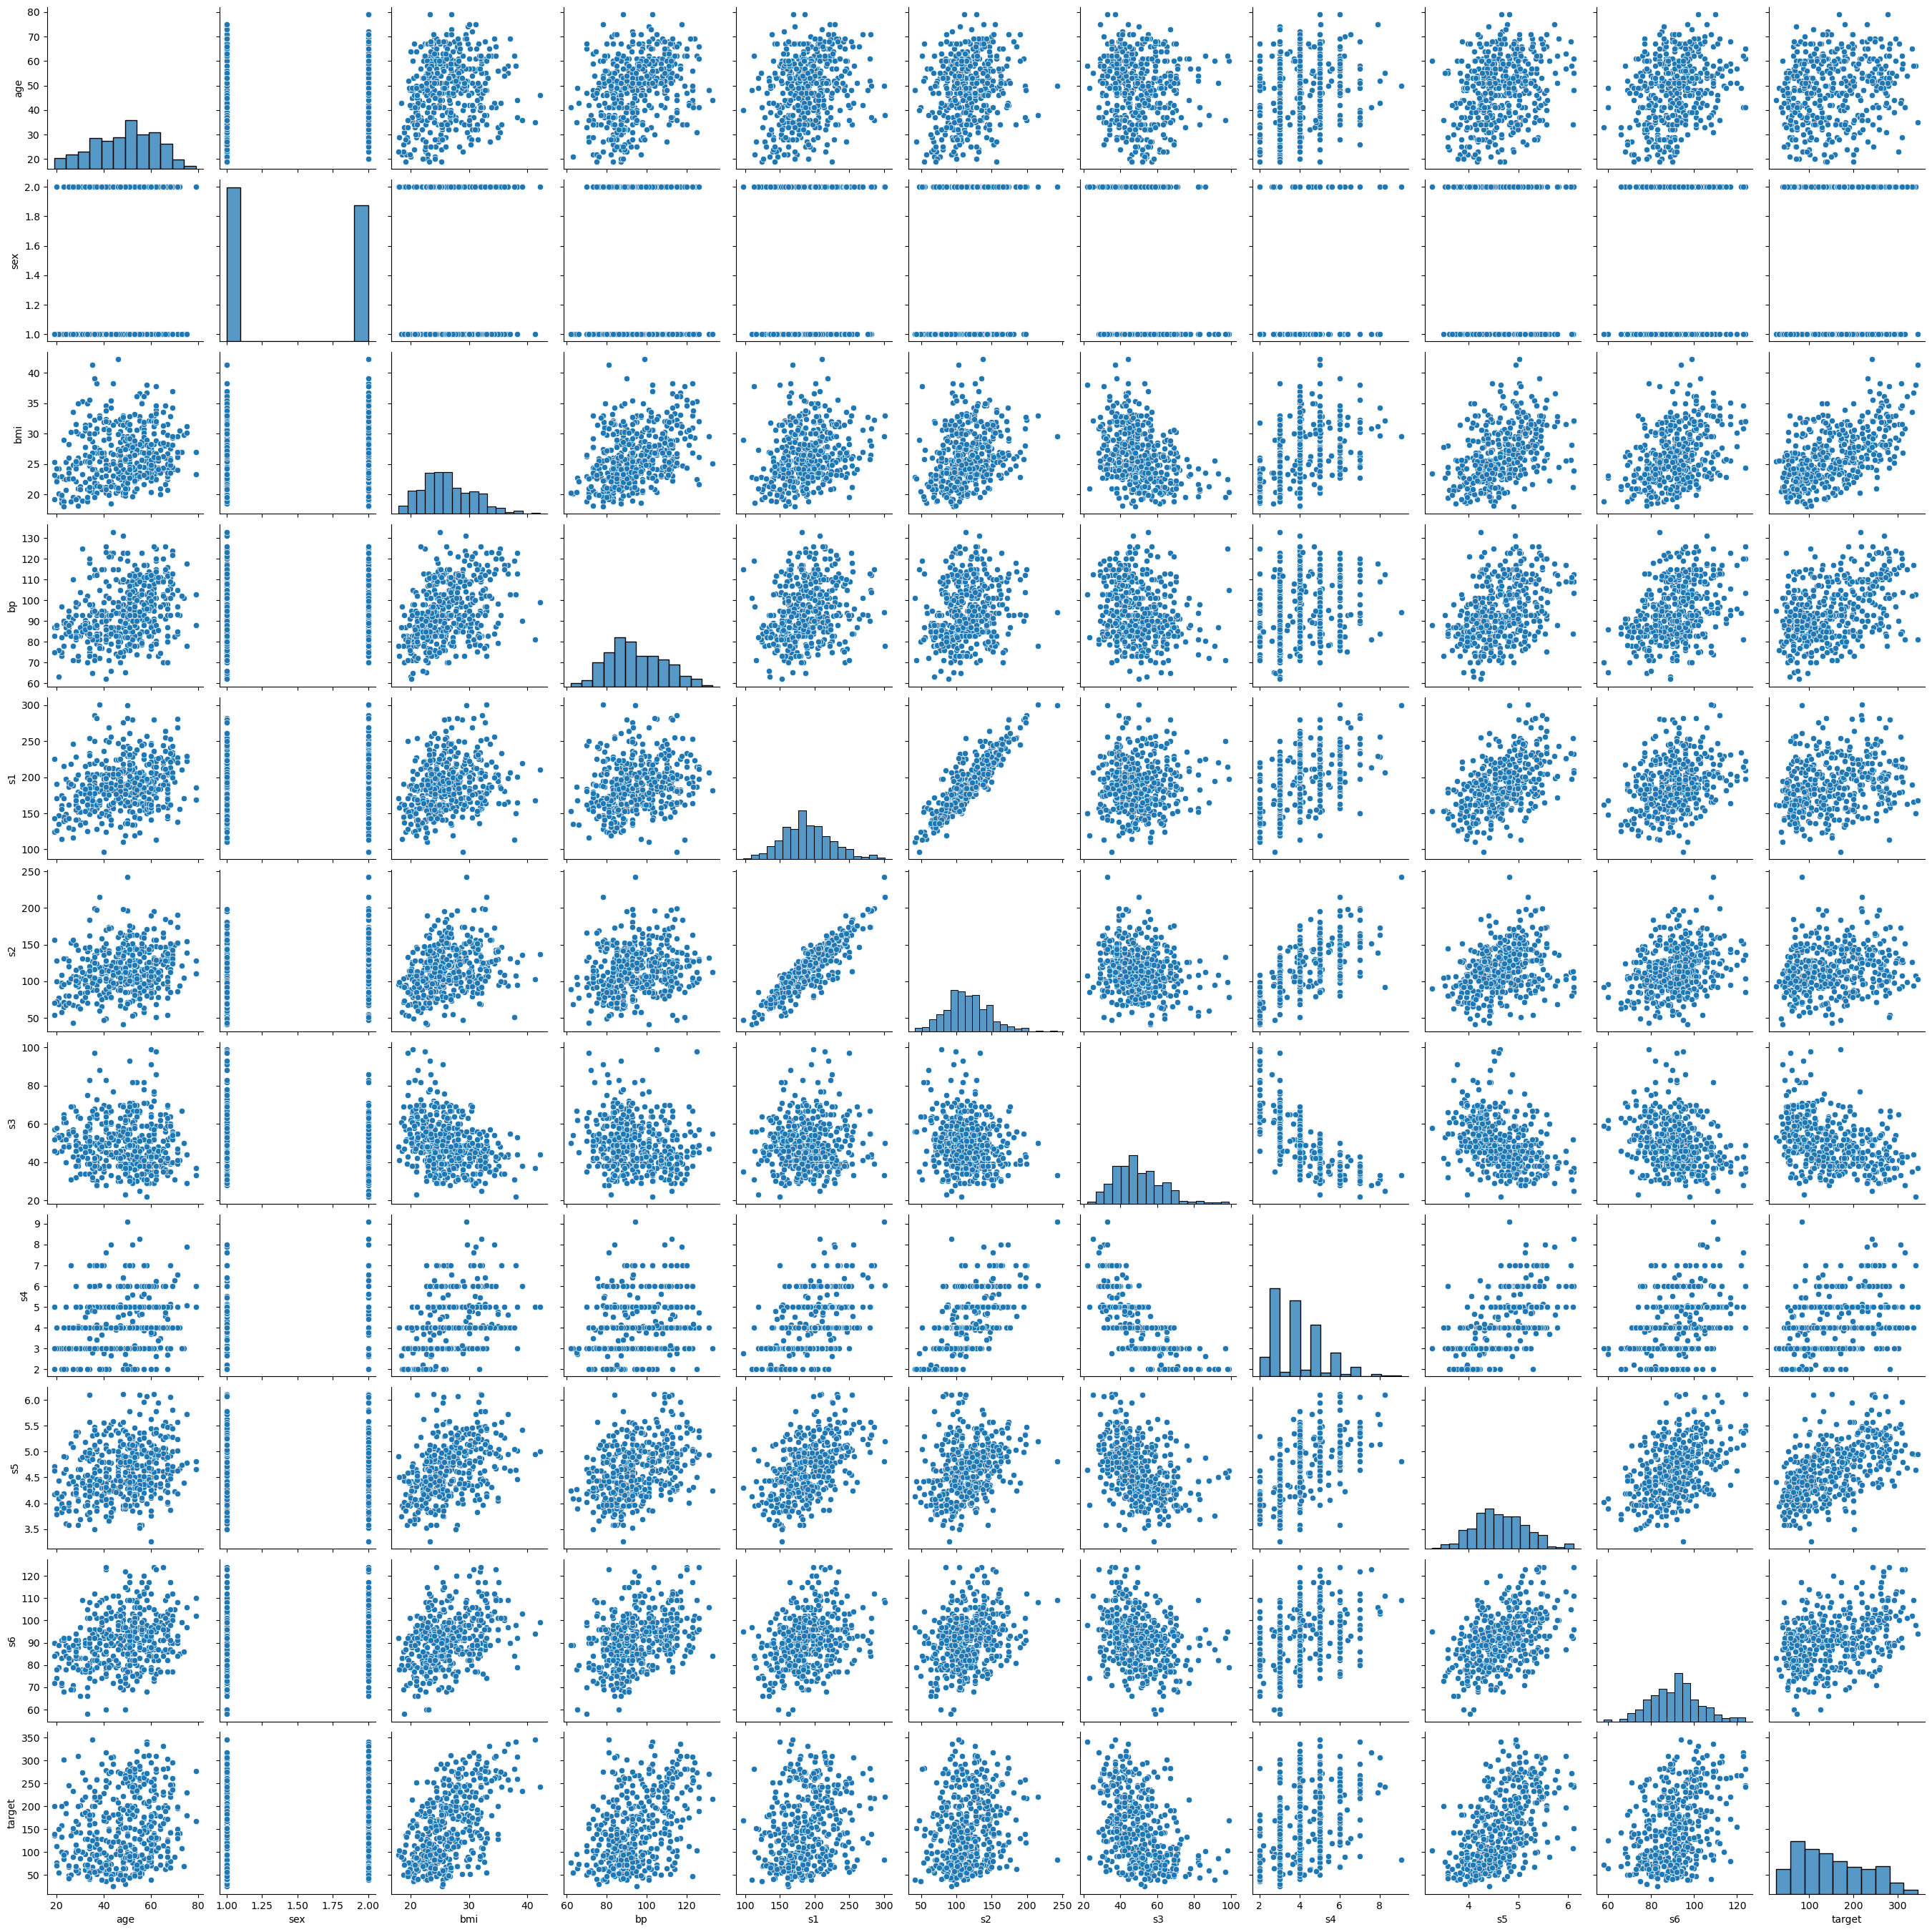

In [6]:
scattermatrix_sns = pairplot(frame, diag_kind='hist')

To numerically calculate the correlations, **DataFrame.corr()** is used, and **DataFrame.sort_values()** is used to sort by correlation with the target values.

In [7]:
corr_mat = frame.corr()
corr_mat.sort_values('target', ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,0.187889,0.043062,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062


From this, the strongest correlations with the target are visibly:
1. *bmi* @ 0.586450
2. *s5* @ 0.565883
3. *bp* @ 0.441482

For the training, a few constant parameters are set to be used for each model variation. 20 points are taken between 10% and 100% of the train set to create a detailed learning curve. Additionally, the negative RMSE score is used for the learning curves.

In [8]:
train_sizes = np.linspace(0.1, 1.0, 20)
line_kw = {'marker': 'o'}
scoring = 'neg_root_mean_squared_error'

Two basic estimators are created using *sklearn's* **Pipeline** class, the linear regression model and the polynomial regression model. 

The linear regression estimator is composed of a **StandardScaler** and the linear regression model itself. The polynomial regression estimator is composed of a **StandardScaler**, a 2nd-degree polynomial transform using **PolynomialFeatures**, and a linear regression model.

The linear estimator exhibits a gap between the train and test sets, likely due to bias in the model learned from the training set. The polynomial estimator shows high overfitting to the train set at low train set sizes, while ultimately converging at a higher set size.

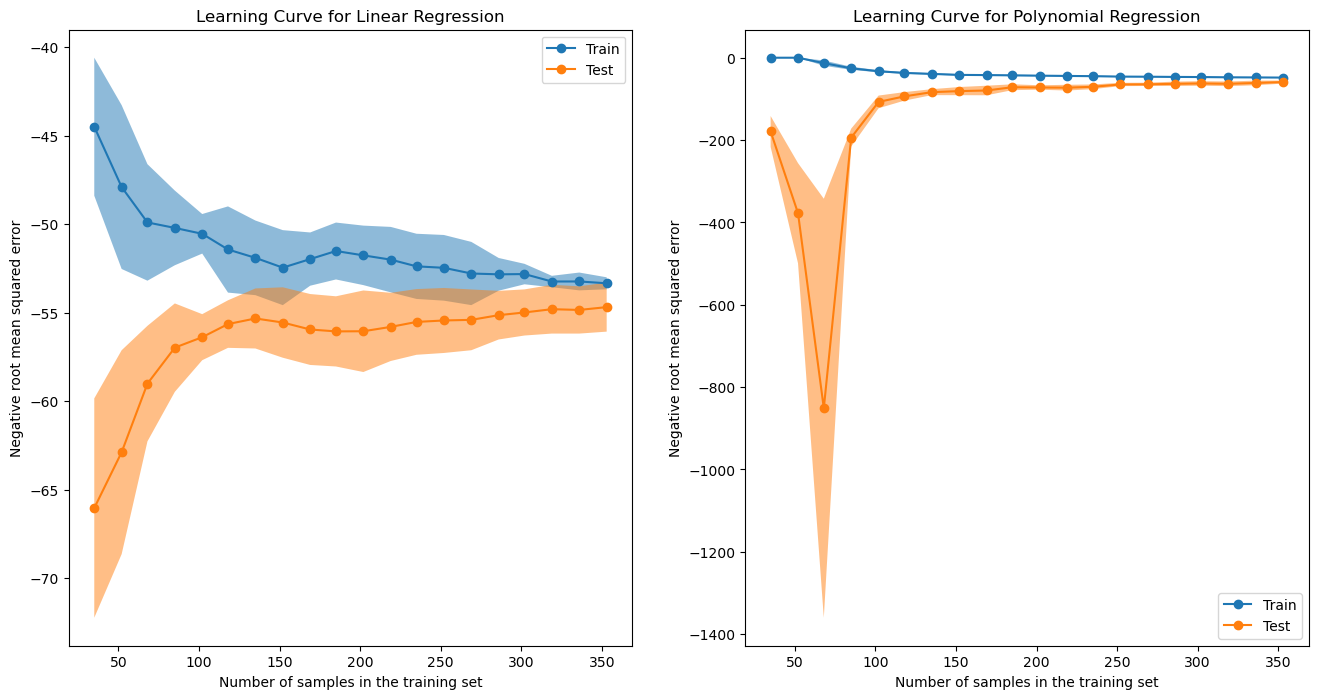

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=False)

lin_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                          ('regression', linear_model.LinearRegression())
                          ])
lin_lcd = LearningCurveDisplay.from_estimator(lin_reg, X, y, 
                                              train_sizes=train_sizes, line_kw=line_kw, 
                                              ax=ax[0], shuffle=True, 
                                              random_state=42, scoring=scoring
                                              )
lin_lcd_title = lin_lcd.ax_.set_title('Learning Curve for Linear Regression')

poly_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('polynomial transform', PolynomialFeatures(2, include_bias=False)), 
                           ('regression', linear_model.LinearRegression())])
poly_lcd = LearningCurveDisplay.from_estimator(poly_reg, X, y, 
                                               train_sizes=train_sizes, line_kw=line_kw, 
                                               ax=ax[1], shuffle=True, 
                                               random_state=42, scoring=scoring
                                               )
poly_title = poly_lcd.ax_.set_title('Learning Curve for Polynomial Regression')

Then, the three regularization techniques are applied to the linear regression estimator. As shown below, these are Ridge, Lasso, and Elastic-Net. All three estimators had their hyperparameters adjusted manually, but for future work, *sklearn's* **GridSearchCV** could be used to optimize them. All three regularization techniques performed relatively similar, with the Lasso regularization performing slightly worse than the other two.

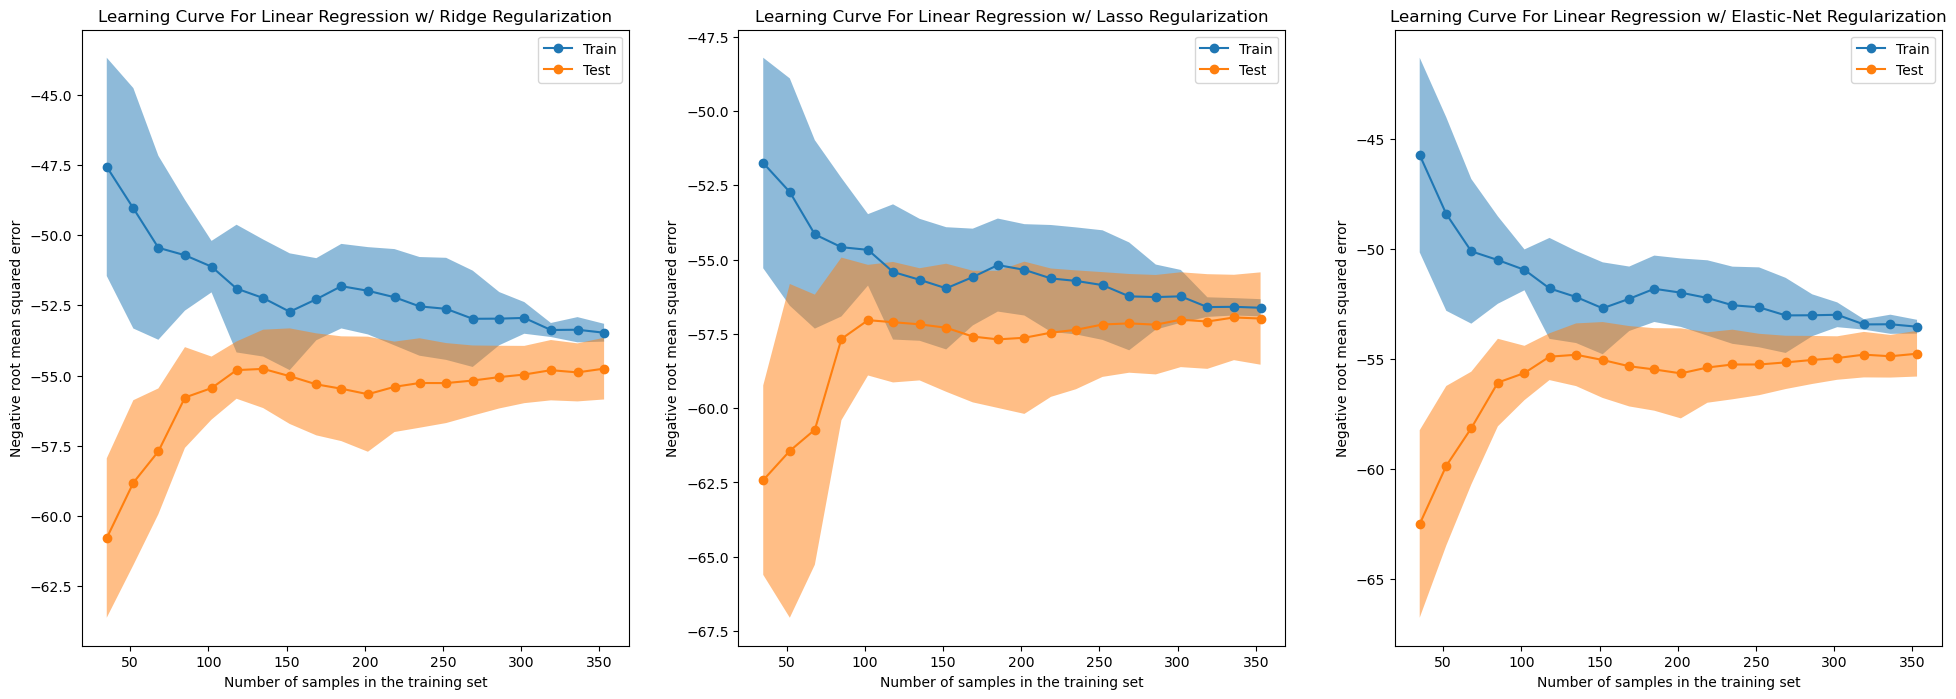

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=False)

ridge_lin_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                ('regression', linear_model.Ridge(alpha=10))
                                ])
ridge_lin_lcd = LearningCurveDisplay.from_estimator(ridge_lin_reg, X, y, 
                                                    train_sizes=train_sizes, line_kw=line_kw, 
                                                    shuffle=True, random_state=42, 
                                                    scoring=scoring, ax=ax[0]
                                                    )
ridge_lin_title = ridge_lin_lcd.ax_.set_title('Learning Curve For Linear Regression w/ Ridge Regularization')

lasso_lin_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                ('regression', linear_model.Lasso(alpha=10))
                                ])
lasso_lin_lcd = LearningCurveDisplay.from_estimator(lasso_lin_reg, X, y, 
                                                    train_sizes=train_sizes, line_kw=line_kw, 
                                                    shuffle=True, random_state=42, 
                                                    scoring=scoring, ax=ax[1]
                                                    )
lasso_lin_title = lasso_lin_lcd.ax_.set_title('Learning Curve For Linear Regression w/ Lasso Regularization')

elasticnet_lin_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                     ('regression', linear_model.ElasticNet(alpha=0.1, l1_ratio=0.5))
                                    ])
elasticnet_lin_lcd = LearningCurveDisplay.from_estimator(elasticnet_lin_reg, X, y, 
                                                         train_sizes=train_sizes, line_kw=line_kw, 
                                                         shuffle=True, random_state=42, 
                                                         scoring=scoring, ax=ax[2]
                                                        )
elasticnet_title = elasticnet_lin_lcd.ax_.set_title('Learning Curve For Linear Regression w/ Elastic-Net Regularization')

Next, a similar process is used to apply the three regularization techniques to the polynomial regression model. The estimators were again tuned manually. The Ridge and Elastic-Net estimators perform similarly, while the Lasso regularization performed slightly better.

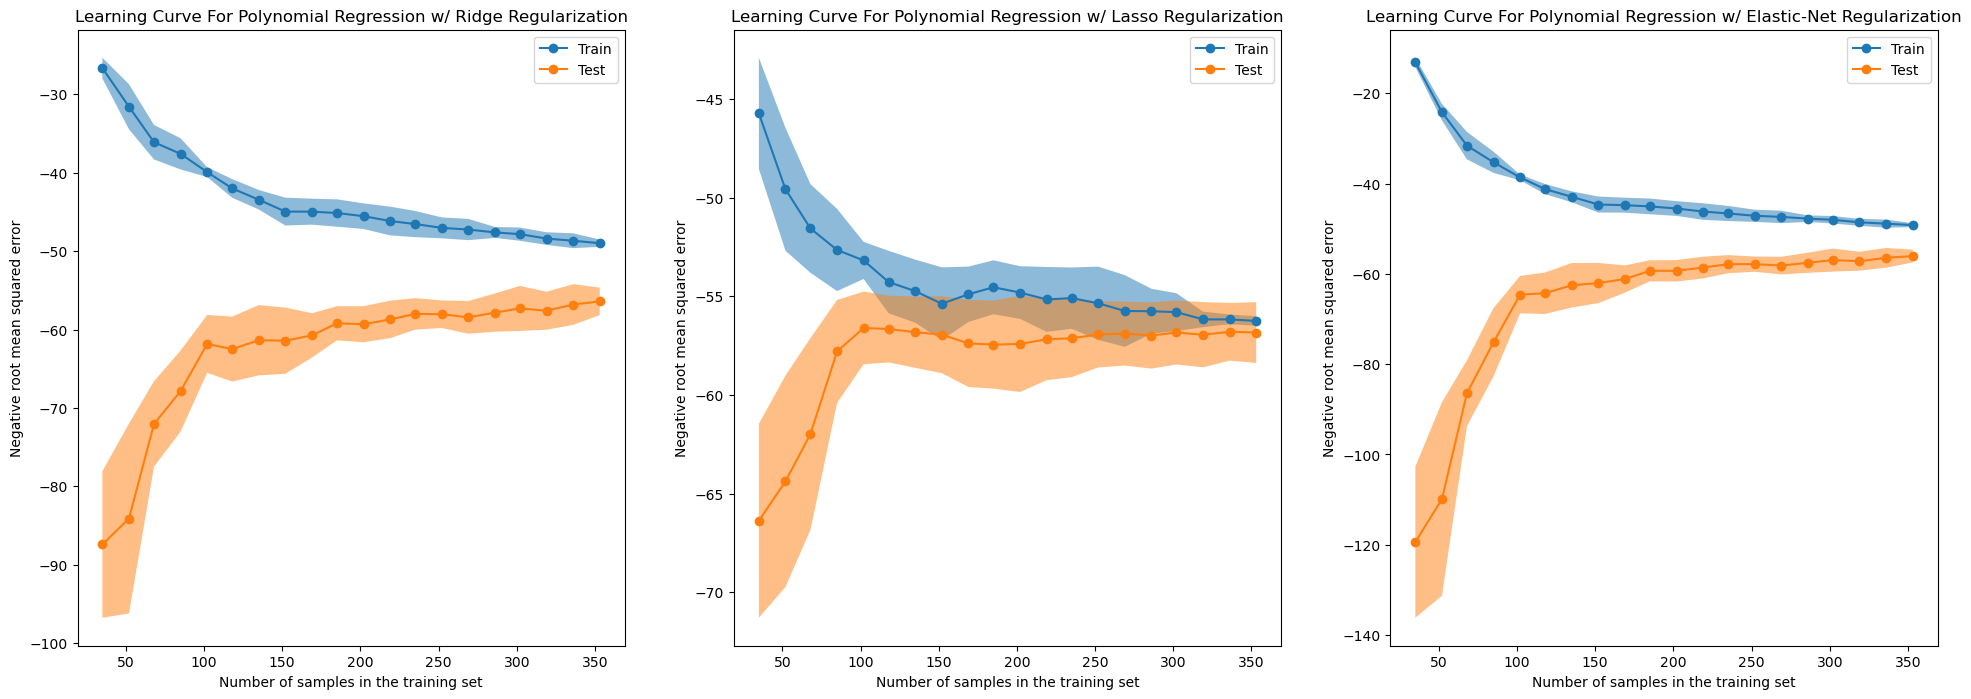

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=False)

ridge_poly_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                 ('polynomial', PolynomialFeatures(include_bias=False)), 
                                 ('regression', linear_model.Ridge(alpha=10))
                                ])
ridge_poly_lcd = LearningCurveDisplay.from_estimator(ridge_poly_reg, X, y, 
                                                     train_sizes=train_sizes, line_kw=line_kw, 
                                                     shuffle=True, random_state=42, 
                                                     scoring=scoring, ax=ax[0]
                                                    )
ridge_poly_title = ridge_poly_lcd.ax_.set_title('Learning Curve For Polynomial Regression w/ Ridge Regularization')

lasso_poly_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                 ('polynomial', PolynomialFeatures(include_bias=False)), 
                                 ('regression', linear_model.Lasso(alpha=10))
                                ])
lasso_poly_lcd = LearningCurveDisplay.from_estimator(lasso_poly_reg, X, y, 
                                                     train_sizes=train_sizes, line_kw=line_kw, 
                                                     shuffle=True, random_state=42, 
                                                     scoring=scoring, ax=ax[1]
                                                    )
lasso_poly_title = lasso_poly_lcd.ax_.set_title('Learning Curve For Polynomial Regression w/ Lasso Regularization')

elasticnet_poly_reg = Pipeline(steps=[('scaler', StandardScaler()), 
                                      ('polynomial', PolynomialFeatures(include_bias=False)), 
                                      ('regression', linear_model.ElasticNet(alpha=0.1, l1_ratio=0.6))
                                    ])
elasticnet_poly_lcd = LearningCurveDisplay.from_estimator(elasticnet_poly_reg, X, y, 
                                                          train_sizes=train_sizes, line_kw=line_kw, 
                                                          shuffle=True, random_state=42, 
                                                          scoring=scoring, ax=ax[2]
                                                        )
elasticnet_poly_title = elasticnet_poly_lcd.ax_.set_title('Learning Curve For Polynomial Regression w/ Elastic-Net Regularization')